LMS算法实现（使用随机梯度下降法优化更新参数）

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def model(X,W,b):
    X = np.array(X)
    return np.sum(X * W) + b

In [3]:
import itertools
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

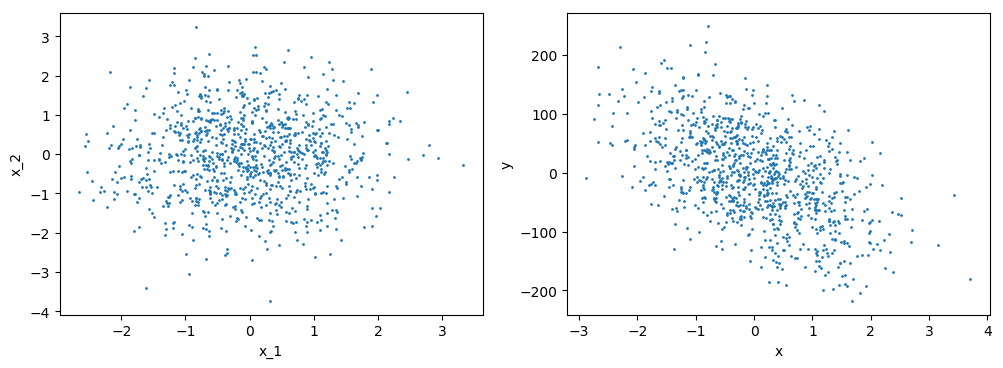

In [4]:
num_train = 1000
num_test = 100
#制作数据集
data = make_regression(n_samples=num_train,n_features=2)
#可视化数据集
plt.figure(figsize=[12,4],dpi=100)
plt.subplot(1,2,1)
plt.scatter(data[0][:,0],data[0][:,1],1)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.subplot(1,2,2)
x = PCA(n_components=1).fit_transform(data[0])
plt.scatter(x,data[1],1)
plt.xlabel('x')
plt.ylabel('y')

train_x,test_x,train_y,test_y = [itertools.cycle(i) for i in train_test_split(data[0],data[1],test_size = num_test)]

Text(0, 0.5, 'losses')

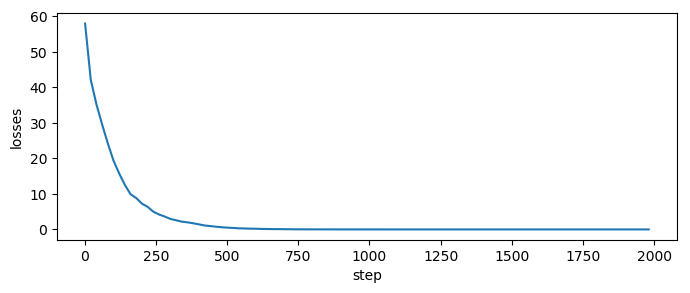

In [8]:
from sklearn.metrics import mean_absolute_error as mse
train_steps = 2000 #训练次数
lr = 0.01 #学习率
summary_step = 20 #摘要频率
summary = [] #摘要
W = np.random.randn(2)
b = 0 
for i in range(train_steps):
    #摘要
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = model(X,W,b)
            tmp.append(np.array([label,out]))
            
        tmp = np.array(tmp)
        #计算均方误差代价
        loss = mse(tmp[:,0],tmp[:,1])
        summary.append(np.array([i+1,loss]))
    # 获得一个样本，并输入模型得到输出结果
    X = next(train_x)
    label = next(train_y)
    out = model(X,W,b)
    # 计算偏导数并更新模型参数
    dW = -X * (label - out)
    W = W - lr * dW
    db = -1 * (label - out)
    b = b - lr * db
#可视化摘要
summary = np.array(summary)
plt.figure(figsize=[8,3],dpi=100)
plt.plot(summary[:,0],summary[:,1])
plt.xlabel('step')
plt.ylabel('losses')

LMS算法实现（使用小批量数据训练）

Text(0, 0.5, 'losses')

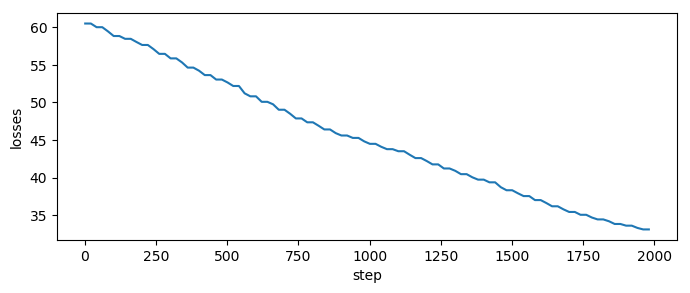

In [10]:
train_steps = 2000 #训练次数
lr = 0.01 #学习率
summary_step = 20 #摘要频率
summary = [] #摘要
tmp_grad_W = 0
tmp_grad_b = 0 
W = np.random.randn(2)
b = 0 
for i in range(train_steps):
    #摘要
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = model(X,W,b)
            tmp.append(np.array([label,out]))
            
        tmp = np.array(tmp)
        #计算均方误差代价
        loss = mse(tmp[:,0],tmp[:,1])
        summary.append(np.array([i+1,loss]))
    # 获得一个样本，并输入模型得到输出结果
    X = next(train_x)
    label = next(train_y)
    out = model(X,W,b)
    # 计算偏导数并更新模型参数
    dW = -X * (label - out)
    db = -1 * (label - out)
    
    tmp_grad_W += dW
    tmp_grad_b += db
    
    if i % 32 == 0:
        W = W - lr * tmp_grad_W/32
        b = b - lr * tmp_grad_b/32
        tmp_grad_W = 0
        tmp_grad_b = 0
#可视化摘要
summary = np.array(summary)
plt.figure(figsize=[8,3],dpi=100)
plt.plot(summary[:,0],summary[:,1])
plt.xlabel('step')
plt.ylabel('losses')

In [1]:
def model(X,W,b):
    X = np.array(X)
    return np.sum(X*W)+b

In [2]:
import itertools
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Text(0, 0.5, 'y')

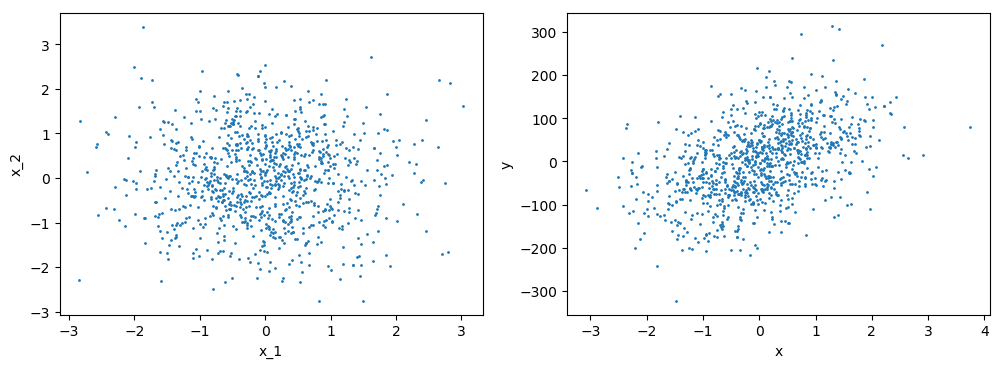

In [4]:
num_train = 1000
num_text = 100
#制作数据集
data = make_regression(n_samples = num_train,n_features=2)
#数据可视化
plt.figure(figsize=[12,4],dpi=100)
plt.subplot(1,2,1)
plt.scatter(data[0][:,0],data[0][:,1],1)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.subplot(1,2,2)
x = PCA(n_components=1).fit_transform(data[0])
plt.scatter(x,data[1],1)
plt.xlabel('x')
plt.ylabel('y')

In [15]:
train_x,test_x,train_y,test_y = [itertools.cycle(i) for i in train_test_split(data[0],data[1],test_size = num_text)]

In [ ]:
from sklearn.metrics import mean_absolute_error as mse

train_steps = 2000
lr = 0.01
summary_step = 20
summary =[]
W = np.random.randn(2)
b = 0
for i in range(train_steps):
    if i % summary_step == 0:
        tmp = []
        for j in range(num_text):
            X = next(test_x)
            out = model(X,W,b)
            tmp.append(np.array([label,out]))
        tmp = np.array(tmp)
        
        loss = mse(tmp[:,0],tmp[:,1])
        summary.append(np.array([i+1,loss]))
        
    X = next(train_x)
    label = next(train_y)
    out = model(X,W,b)
    
    dW = -X * (label - out)
    W = W - lr*dW
    db = -1 * (label - out)
    b = b - lr * db
#可视化摘要
summary = np.array(summary)
plt.figure(figsize=[8,3],dpi=100)
plt.plot(summary[:,0],summary[:,1])
plt.xlabel('step')
plt.ylabel('losses')